<a href="https://colab.research.google.com/github/PanavShah1/Summer_of_Science_Image_Processing/blob/main/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

from matplotlib import pyplot as plt

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
!wget 'https://media.designcafe.com/wp-content/uploads/2023/03/14120252/mansion-interior.jpg'

--2024-06-26 04:07:24--  https://media.designcafe.com/wp-content/uploads/2023/03/14120252/mansion-interior.jpg
Resolving media.designcafe.com (media.designcafe.com)... 18.239.83.80, 18.239.83.61, 18.239.83.24, ...
Connecting to media.designcafe.com (media.designcafe.com)|18.239.83.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165893 (162K) [image/jpeg]
Saving to: ‘mansion-interior.jpg.1’

mansion-interior.jp 100%[===================>] 162.00K  --.-KB/s    in 0.01s   

2024-06-26 04:07:24 (13.1 MB/s) - ‘mansion-interior.jpg.1’ saved [165893/165893]



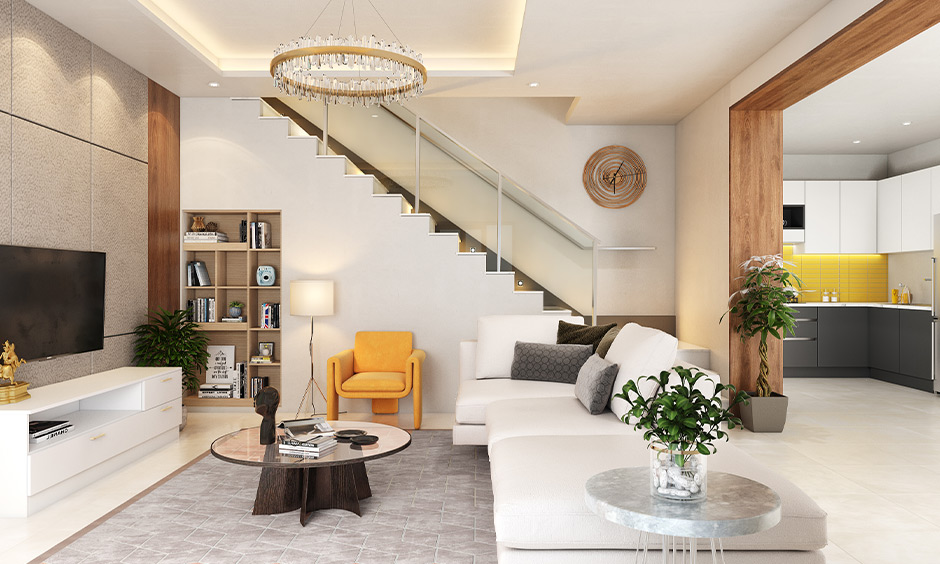

In [ ]:
ig = Image.open("/content/mansion-interior.jpg")
ig

In [ ]:
transform = transforms.ToTensor()
img = transform(ig)
img

tensor([[[0.6667, 0.7098, 0.6196,  ..., 0.6510, 0.6667, 0.7137],
         [0.5569, 0.6118, 0.5922,  ..., 0.6549, 0.6941, 0.6824],
         [0.6078, 0.5725, 0.5843,  ..., 0.6471, 0.6627, 0.6431],
         ...,
         [0.9961, 0.9961, 0.9922,  ..., 0.9412, 0.9451, 0.9451],
         [0.9922, 0.9922, 0.9882,  ..., 0.9412, 0.9412, 0.9412],
         [0.9882, 0.9882, 0.9882,  ..., 0.9373, 0.9373, 0.9373]],

        [[0.5961, 0.6392, 0.5490,  ..., 0.4314, 0.4471, 0.4941],
         [0.4863, 0.5412, 0.5216,  ..., 0.4431, 0.4824, 0.4706],
         [0.5373, 0.5020, 0.5137,  ..., 0.4431, 0.4588, 0.4392],
         ...,
         [0.9765, 0.9765, 0.9725,  ..., 0.9216, 0.9255, 0.9255],
         [0.9725, 0.9725, 0.9686,  ..., 0.9216, 0.9216, 0.9216],
         [0.9686, 0.9686, 0.9686,  ..., 0.9176, 0.9176, 0.9176]],

        [[0.5412, 0.5843, 0.4941,  ..., 0.2863, 0.3020, 0.3490],
         [0.4314, 0.4863, 0.4667,  ..., 0.2941, 0.3333, 0.3216],
         [0.4824, 0.4471, 0.4588,  ..., 0.2902, 0.3059, 0.

In [ ]:
img.shape

torch.Size([3, 564, 940])

In [ ]:
with torch.no_grad():
  pred = model([img])

In [ ]:
pred

[{'boxes': tensor([[7.2009e+02, 2.5277e+02, 8.0722e+02, 4.3874e+02],
          [3.2720e+02, 3.3240e+02, 4.2178e+02, 4.3037e+02],
          [1.2819e+02, 3.0321e+02, 2.1412e+02, 4.0721e+02],
          [6.4876e+02, 4.4289e+02, 7.0948e+02, 5.0066e+02],
          [4.6266e+02, 3.2319e+02, 7.6014e+02, 5.2468e+02],
          [5.9434e+02, 3.4339e+02, 7.5132e+02, 4.9958e+02],
          [2.7761e+02, 4.3382e+02, 3.3596e+02, 4.5423e+02],
          [2.7871e+02, 4.4487e+02, 3.2061e+02, 4.5660e+02],
          [7.1102e-01, 2.4575e+02, 1.0927e+02, 3.7539e+02],
          [5.5421e+02, 4.4666e+02, 8.0626e+02, 5.5362e+02],
          [1.9304e+02, 2.6138e+02, 2.1089e+02, 2.8666e+02],
          [2.7967e+02, 4.2095e+02, 3.2526e+02, 4.4787e+02],
          [2.7949e+02, 4.4944e+02, 3.1945e+02, 4.6148e+02],
          [4.5154e+02, 3.1501e+02, 6.6669e+02, 4.5040e+02],
          [1.9604e+02, 2.9915e+02, 2.0120e+02, 3.2287e+02],
          [3.4989e+02, 4.3585e+02, 3.7785e+02, 4.4389e+02],
          [1.9897e+02, 2.9901e+

In [ ]:
len(pred)

1

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
boxes, labels, scores = pred[0]['boxes'], pred[0]['labels'], pred[0]['scores']

In [ ]:
len(boxes), len(labels), len(scores)

(92, 92, 92)

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
igg = cv2.imread("/content/mansion-interior.jpg")
for i in range(5):
  igg = cv2.rectangle(igg, (int(boxes[i][0]), int(boxes[i][1])), (int(boxes[i][2]), int(boxes[i][3])), (0, 255, 0), 1)
  class_name = coco_names[labels.numpy()[i] - 1]
  igg = cv2.putText(igg, class_name, (int(boxes[i][0]), int(boxes[i][1] - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1, cv2.LINE_AA)

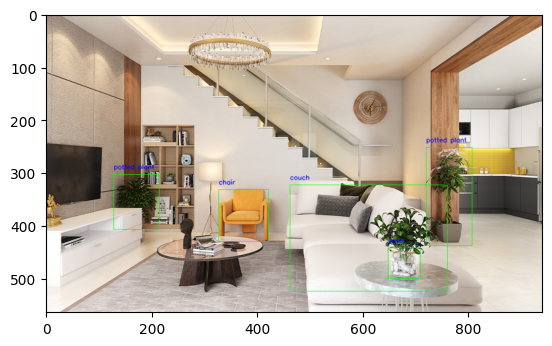

In [ ]:
plt.imshow(igg[:, :, ::-1])